# Fitter: Libreria de Python para identificar una fdp a partir de datos de muestra


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
from scipy import stats

In [22]:
pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Importamos fitter
from fitter import Fitter

Documentación de la librería: https://fitter.readthedocs.io/en/latest/

In [6]:
# Lectura de datos
df = pd.read_csv('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/sbase/subte-viajes-molinetes/BaseUnificadaEstaciones.csv')

Información del dataset
https://data.buenosaires.gob.ar/dataset/juqdkmgo-202/archivo/ab5afa94-00ef-42ea-93e2-ac05a8bedcc8

In [7]:
# 5 primeros registros del DF
df.head()

,FECHA,ESTACION,LINEA,DESDE,HORA,CANTIDAD
0,3/1/2020,Acoyte,A,7:45,7,20
1,3/1/2020,Acoyte,A,8:00,8,16
2,3/1/2020,Acoyte,A,8:15,8,22
3,3/1/2020,Acoyte,A,8:30,8,27
4,3/1/2020,Acoyte,A,8:45,8,37


In [19]:
type(df)

pandas.core.frame.DataFrame

In [8]:
# Nro de registros y columnas
df.shape

(822363, 6)

In [9]:
# Tipos de datos
df.dtypes

FECHA       object
ESTACION    object
LINEA       object
DESDE       object
HORA         int64
CANTIDAD     int64
dtype: object

In [10]:
# Control de nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822363 entries, 0 to 822362
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FECHA     822363 non-null  object
 1   ESTACION  822363 non-null  object
 2   LINEA     822363 non-null  object
 3   DESDE     822363 non-null  object
 4   HORA      822363 non-null  int64 
 5   CANTIDAD  822363 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 37.6+ MB


In [11]:
# Cantidad de registros por estacion
df['ESTACION'].value_counts()

Carlos Pellegrini    16571
Constitucion         16500
Retiro               16463
Medrano              16373
Federico Lacroze     16226
                     ...  
Echeverria            1228
Catalinas             1220
Varela                1218
Pasco                 1211
Medalla Milagrosa     1208
Name: ESTACION, Length: 89, dtype: int64

In [12]:
# Armado de DF por estación
df_retiro = df[df.ESTACION == 'Retiro']
df_medrano = df[df.ESTACION == 'Medrano']
df_pueyrredon = df[df.ESTACION == 'Pueyrredon']
df_juramento = df[df.ESTACION == 'Juramento']
df_callao = df[df.ESTACION == 'Callao']
df_acoyte = df[df.ESTACION == 'Acoyte']
df_jujuy = df[df.ESTACION == 'Jujuy']

Prueba Fitter

In [13]:
# Armo función de prueba
fprueba = stats.gamma.rvs(2, loc=1.5, scale=2, size=100000)

In [14]:
fprueba

array([7.16526623, 2.02501272, 2.86402778, ..., 3.25629634, 4.73114829,
       1.87112159])

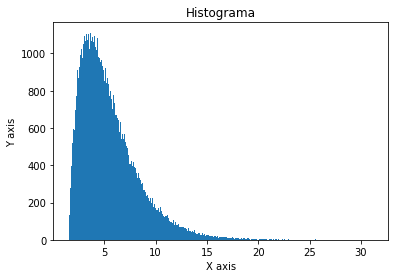

In [15]:

x = fprueba
#y = np.sort(x)

# plotting
plt.title("Histograma")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.hist(x, bins=500)
plt.show()

In [20]:
type(x)
#x.hist('CANTIDAD',bins = 80, edgecolor='black')

numpy.ndarray

In [ ]:
f = Fitter(fprueba, distributions=['gamma', 'rayleigh', 'uniform'])

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000150,1118.300374,-2.031653e+06,inf,0.002157,0.739717
rayleigh,0.026865,1682.358119,-1.512963e+06,inf,0.086338,0.000000
uniform,0.334783,653.636015,-1.260697e+06,inf,0.597529,0.000000


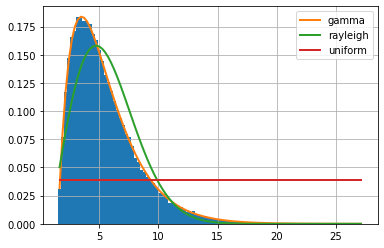

In [ ]:
f.fit()
f.summary()

FDPs Estaciones

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe22a1b190>]],
      dtype=object)

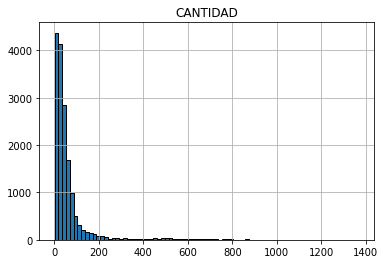

In [17]:
# histograma de estaciones

df_retiro.hist('CANTIDAD',bins = 80, edgecolor='black')
#df_retiro.hist('CANTIDAD')

In [ ]:
f1 = Fitter(df_retiro.CANTIDAD)

In [ ]:
f1.fit()

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4837: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
foldcauchy,0.000004,1969.013431,-366475.972182,inf,0.028732,3.064342e-12
alpha,0.000007,2030.947961,-356261.249222,inf,0.028319,6.653198e-12
burr12,0.000007,2075.761655,-354506.710099,inf,0.025637,7.832194e-10
fisk,0.000007,2077.094681,-354109.642898,inf,0.025648,7.693131e-10
mielke,0.000008,2100.927427,-353896.553968,inf,0.023911,1.311025e-08


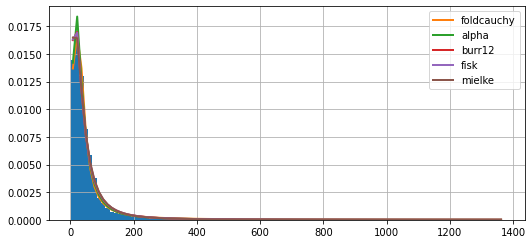

In [ ]:
f1.summary()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50797291d0>]],
      dtype=object)

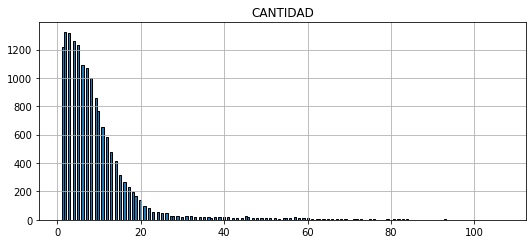

In [ ]:
df_jujuy.hist('CANTIDAD',bins = 200, edgecolor='black')

In [ ]:
f2 = Fitter(df_jujuy.CANTIDAD)

In [ ]:
f2.fit()

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:880: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)


,sumsquare_error,aic,bic,kl_div
beta,0.001781,1818.809292,-180925.646215,inf
chi,0.001903,3475.350726,-180171.337254,inf
pearson3,0.002153,1823.605265,-178746.619080,inf
halfgennorm,0.002555,1402.791311,-176771.430392,inf
genpareto,0.002653,1433.157132,-176336.752140,inf


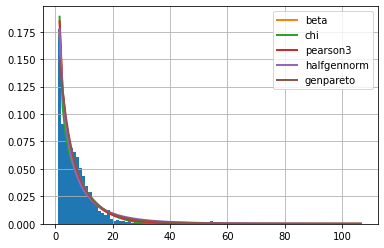

In [ ]:
f2.summary()